BOOBALARAGAVAN. P
boobalaragavan0520@gmail.com
7667992244

In [2]:
# IMPORTING THE NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
# LOADING THE DATASETS INTO THE FRAME

player_performance_data = pd.read_excel("F:/COLLEGE/INTERNSHIP AND PLACEMENT/PLACEMENT PROCESS - 2022 TO 2023/OFF CAMPUS/LITIFER/PlayerPerformancedataset.xlsx")
team_strategy_data = pd.read_excel("F:/COLLEGE/INTERNSHIP AND PLACEMENT/PLACEMENT PROCESS - 2022 TO 2023/OFF CAMPUS/LITIFER/TeamStrategyData.xlsx")
team_past_performance_data = pd.read_excel("F:/COLLEGE/INTERNSHIP AND PLACEMENT/PLACEMENT PROCESS - 2022 TO 2023/OFF CAMPUS/LITIFER/Team'sPastPerformanceData.xlsx")

In [4]:
# SAMPLE EDA FOR PLAYER PERFORMANCE DATASET

# DISPLAYING THE NUMBER OF OBSERVATIONS
print("Number of Columns and Rows : ", player_performance_data.shape, "\n")


# DISPLAYING THE LIST OF ATTRIBUTES AVAILABLE IN THE DATASET
print("List of Attributes : ", player_performance_data.columns, "\n")

# TAKING A CLOSER LOOK OF THE DATA
print("\n\n", player_performance_data.head(), "\n\n")

# DISPLAYS MORE INFORMATION ABOUT DATASET
print(player_performance_data.info(), "\n")




Number of Columns and Rows :  (30, 12) 

List of Attributes :  Index(['TeamName', 'Player Name', 'Goals Scored', 'Assists',
       'Pass Completion %', 'Successful Tackles', 'Interceptions',
       'Shots on Target', 'Key Passes', 'Distance Covered', 'Yellow Cards',
       'Red Cards'],
      dtype='object') 



           TeamName Player Name  Goals Scored  Assists  Pass Completion %  \
0  Manchester City    Player 1            10        5                 85   
1  Manchester City    Player 2             5        8                 90   
2  Manchester City    Player 3             7        3                 88   
3  Manchester City    Player 4             2       12                 92   
4  Manchester City    Player 5             6        7                 86   

   Successful Tackles  Interceptions  Shots on Target  Key Passes  \
0                  20             10               25          15   
1                  15             12               20          10   
2                  18

In [5]:
# SAMPLE EDA FOR TEAM STRATEGY DATASET

# DISPLAYING THE NUMBER OF OBSERVATIONS
print("Number of Columns and Rows : ", team_strategy_data.shape, "\n")


# DISPLAYING THE LIST OF ATTRIBUTES AVAILABLE IN THE DATASET
print("List of Attributes : ", team_strategy_data.columns, "\n")

# TAKING A CLOSER LOOK OF THE DATA
print("\n\n", team_strategy_data.head(), "\n\n")

# DISPLAYS MORE INFORMATION ABOUT DATASET
print(team_strategy_data.info(), "\n")




Number of Columns and Rows :  (8, 7) 

List of Attributes :  Index(['TeamName', 'Possession-based Strategy', 'Counter-attacking Strategy',
       'Pressing Intensity', 'Defensive Line', 'Attacking Style',
       'Set-piece Tactics'],
      dtype='object') 



           TeamName Possession-based Strategy Counter-attacking Strategy  \
0  Manchester City                      High                   Moderate   
1      Inter Milan                  Moderate                       High   
2        Barcelona                 Very High                        Low   
3      Real Madrid                      High                   Moderate   
4        Liverpool                      High                       High   

  Pressing Intensity Defensive Line  Attacking Style Set-piece Tactics  
0               High           High     Free-flowing            Varied  
1           Moderate         Medium           Direct        Target men  
2               High           High  Possession-base  d  Short passin

In [6]:
# SAMPLE EDA FOR TEAM STRATEGY DATASET

# DISPLAYING THE NUMBER OF OBSERVATIONS
print("Number of Columns and Rows : ", team_past_performance_data.shape, "\n")


# DISPLAYING THE LIST OF ATTRIBUTES AVAILABLE IN THE DATASET
print("List of Attributes : ", team_past_performance_data.columns, "\n")

# TAKING A CLOSER LOOK OF THE DATA
print("\n\n", team_past_performance_data.head(), "\n\n")

# DISPLAYS MORE INFORMATION ABOUT DATASET
print(team_past_performance_data.info(), "\n")




Number of Columns and Rows :  (10, 10) 

List of Attributes :  Index(['TeamName', 'Season', 'League', 'Matches Played', 'Matches Won',
       'Matches Drawn', 'Matches Lost', 'Goals Scored', 'Goals Conceded',
       'Points'],
      dtype='object') 



           TeamName     Season          League  Matches Played  Matches Won  \
0  Manchester City  2020-2021  Premier League              38           27   
1  Manchester City  2020-2021         Serie A              38           24   
2  Manchester City  2020-2021         La Liga              38           23   
3  Manchester City  2020-2021      Bundesliga              34           22   
4  Manchester City  2020-2021         Ligue 1              38           25   

   Matches Drawn  Matches Lost  Goals Scored  Goals Conceded  Points  
0              5             6            83              32      86  
1              7             7            78              38      79  
2              8             7            76              40    

In [7]:
# DATA TRANSFORMATIONS

# PERFORMING THE NECESSARY REPLACEMENTS
# FOR EXAMPLE, PLEASE FIND THE BELOW FOLLOWING REPLACEMENTS
# THE VALUE 'Very High' IS REPLACED WITH INTEGER VALUE 1.0
# THE VALUE 'High' IS REPLACED WITH INTEGER VALUE 0.75
# THE VALUE 'Moderate' or 'Medium' IS REPLACED WITH INTEGER VALUE 0.50
# THE VALUE 'Low' IS REPLACED WITH INTEGER VALUE 0
team_strategy_data['Possession-based Strategy'] = team_strategy_data['Possession-based Strategy'].replace('Very High', 1)
team_strategy_data['Possession-based Strategy'] = team_strategy_data['Possession-based Strategy'].replace('High', 0.75)
team_strategy_data['Possession-based Strategy'] = team_strategy_data['Possession-based Strategy'].replace('Moderate', 0.5)
team_strategy_data['Possession-based Strategy'] = team_strategy_data['Possession-based Strategy'].replace('Medium', 0.5)
team_strategy_data['Possession-based Strategy'] = team_strategy_data['Possession-based Strategy'].replace('Low', 0)

team_strategy_data['Counter-attacking Strategy'] = team_strategy_data['Counter-attacking Strategy'].replace('Very High', 1)
team_strategy_data['Counter-attacking Strategy'] = team_strategy_data['Counter-attacking Strategy'].replace('High', 0.75)
team_strategy_data['Counter-attacking Strategy'] = team_strategy_data['Counter-attacking Strategy'].replace('Moderate', 0.5)
team_strategy_data['Counter-attacking Strategy'] = team_strategy_data['Counter-attacking Strategy'].replace('Medium', 0.5)
team_strategy_data['Counter-attacking Strategy'] = team_strategy_data['Counter-attacking Strategy'].replace('Low', 0)

team_strategy_data['Pressing Intensity'] = team_strategy_data['Pressing Intensity'].replace('Very High', 1)
team_strategy_data['Pressing Intensity'] = team_strategy_data['Pressing Intensity'].replace('High', 0.75)
team_strategy_data['Pressing Intensity'] = team_strategy_data['Pressing Intensity'].replace('Moderate', 0.5)
team_strategy_data['Pressing Intensity'] = team_strategy_data['Pressing Intensity'].replace('Medium', 0.5)
team_strategy_data['Pressing Intensity'] = team_strategy_data['Pressing Intensity'].replace('Low', 0)

team_strategy_data['Defensive Line'] = team_strategy_data['Defensive Line'].replace('Very High', 1)
team_strategy_data['Defensive Line'] = team_strategy_data['Defensive Line'].replace('High', 0.75)
team_strategy_data['Defensive Line'] = team_strategy_data['Defensive Line'].replace('Moderate', 0.5)
team_strategy_data['Defensive Line'] = team_strategy_data['Defensive Line'].replace('Medium', 0.5)
team_strategy_data['Defensive Line'] = team_strategy_data['Defensive Line'].replace('Low', 0)


team_strategy_data.head()

,TeamName,Possession-based Strategy,Counter-attacking Strategy,Pressing Intensity,Defensive Line,Attacking Style,Set-piece Tactics
0,Manchester City,0.75,0.50,0.75,0.75,Free-flowing,Varied
1,Inter Milan,0.50,0.75,0.50,0.50,Direct,Target men
2,Barcelona,1.00,0.00,0.75,0.75,Possession-base,d Short passing
3,Real Madrid,0.75,0.50,0.75,0.75,Balanced,Mixed
4,Liverpool,0.75,0.75,1.00,0.75,High tempo,Aggressive


In [8]:
# FEATURE SELECTION PROCESS FOR SELECTING PARTICULAR COLUMNAR DATA FROM THE THREE DATASETS

# SELECTING THE COLUMNS FROM ALL THREE DATASETS FOR FEATURE SELECTION
player_performance_columns = ['TeamName','Player Name', 'Goals Scored', 'Assists']
team_strategies_columns = ['TeamName', 'Possession-based Strategy', 'Defensive Line']
team_past_performance_columns = ['TeamName', 'Points']

# MERGING THE SELECTED COLUMNS INTO A SINGLE DATASET
merged_data = pd.merge(player_performance_data[player_performance_columns], team_strategy_data[team_strategies_columns], on='TeamName')
features_selection_data = pd.merge(merged_data, team_past_performance_data[team_past_performance_columns], on='TeamName')

# HAVING A LOOK ON MERGED DATA
print(features_selection_data)


            TeamName Player Name  Goals Scored  Assists  \
0    Manchester City    Player 1            10        5   
1    Manchester City    Player 1            10        5   
2    Manchester City    Player 1            10        5   
3    Manchester City    Player 1            10        5   
4    Manchester City    Player 1            10        5   
..               ...         ...           ...      ...   
145      Inter Milan   Player 15             2       12   
146      Inter Milan   Player 15             2       12   
147      Inter Milan   Player 15             2       12   
148      Inter Milan   Player 15             2       12   
149      Inter Milan   Player 15             2       12   

     Possession-based Strategy  Defensive Line  Points  
0                         0.75            0.75      86  
1                         0.75            0.75      79  
2                         0.75            0.75      77  
3                         0.75            0.75      72  
4     

In the following next code cell, the KMeans algorithm is used to find the best team. In which clustering is performed on the specific attributes of the dataset. The cluster labels are obtained, and the cluster with the highest average value is identified as the best cluster. The data is then filtered based on the cluster labels to retrieve the name of the best team.


In [9]:
# FEATURE SELECTION COLUMNS
features = ['Goals Scored', 'Assists', 'Possession-based Strategy', 'Defensive Line', 'Points']

# PERFORMING CLUSTERING
# SPECIFYING THE NUMBER OF CLUSTERS
k = 2  
kmeans = KMeans(n_clusters=k)
kmeans.fit(features_selection_data[features])

# GETTING THE CLUSTERED LABELS FROM THE DATA
cluster_labels = kmeans.predict(features_selection_data[features])

# FINDING THE BEST TEAM BASED ON THE CLUSTER WITH THE HIGHEST AVERAGE VALUE
cluster_means = features_selection_data.groupby(cluster_labels)[features].mean()
best_cluster = cluster_means.idxmax().values[0]

# CONVERTING THE ABOVE DATA INTO A DATAFRAME
data_df = pd.DataFrame(features_selection_data)

# FILTERING THE DATAFRAME BASED ON THE CLUSTER LABELS
indices = np.where(cluster_labels == best_cluster)[0]

# RETREIVING THE NAME OF BEST TEAM ONLY
best_team = data_df.iloc[indices]['TeamName'].values[0]  

print('BEST TEAM FOR THE FINAL IS :', best_team)


BEST TEAM FOR THE FINAL IS : Manchester City


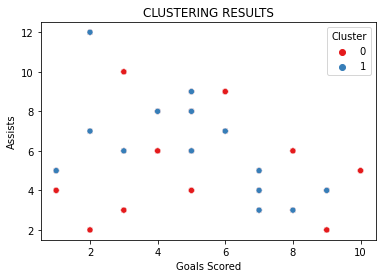

In [10]:
# ADDING CLUSTERED LABELS TO THE DATASET
features_selection_data['Cluster'] = cluster_labels

# VISUALIZING IT USING SCATTER PLOT
sns.scatterplot(data=features_selection_data, x='Goals Scored', y='Assists', hue='Cluster', palette='Set1')
plt.title('CLUSTERING RESULTS')
plt.xlabel('Goals Scored')
plt.ylabel('Assists')
plt.show()


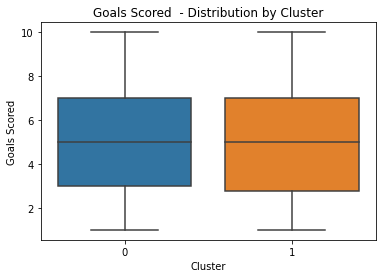

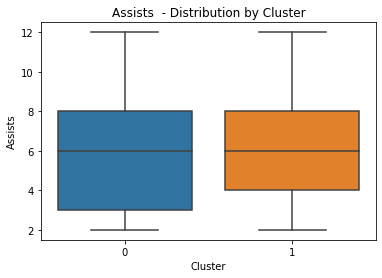

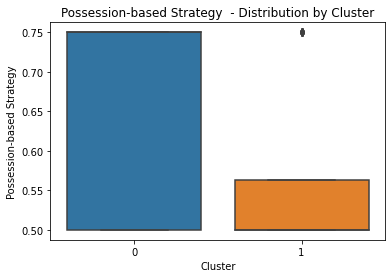

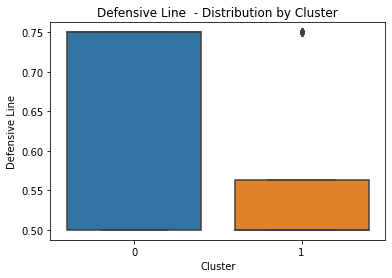

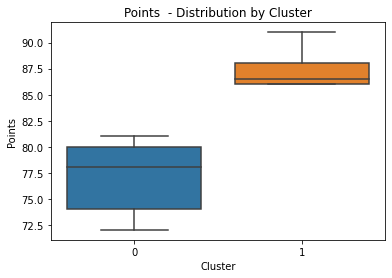

In [11]:
# VISUALIZING EVERY FEATURES USING BOX PLOT

for feature in features:
    sns.boxplot(data=features_selection_data, x='Cluster', y=feature)
    plt.title(f'{feature}  - Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

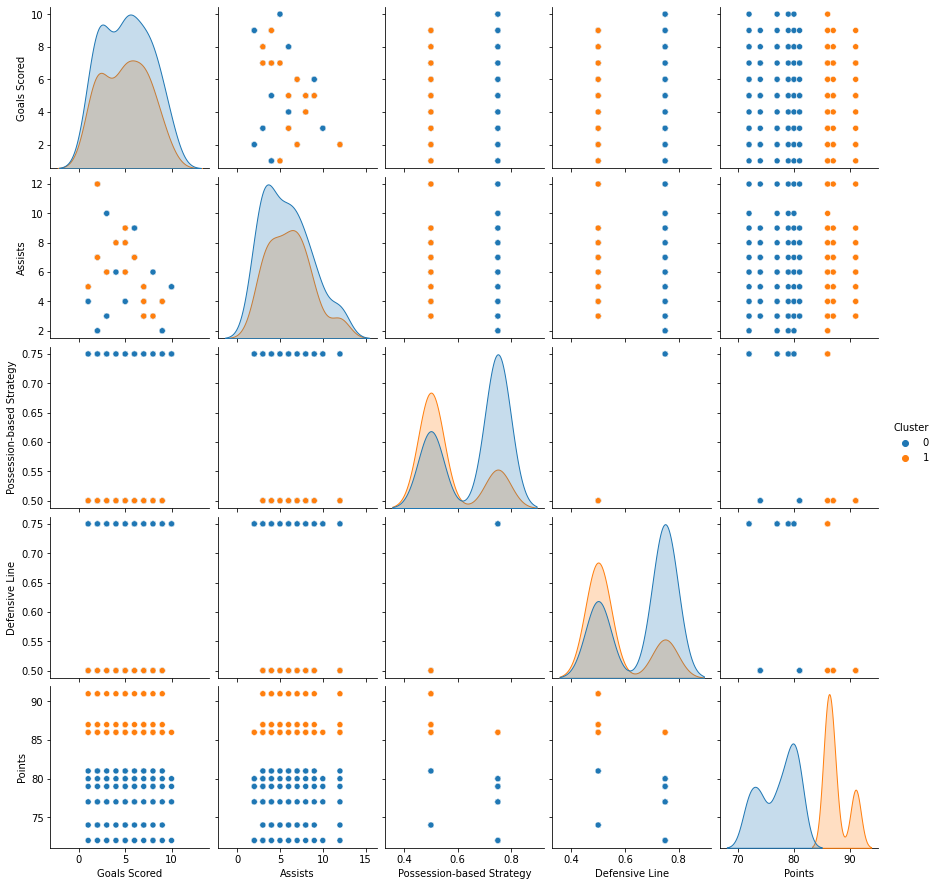

In [12]:
# VISUALIZING EVERY FEATURES AGAIN USING PAIR PLOT

sns.pairplot(data=features_selection_data, hue='Cluster', vars=features)
plt.show()

CORRELATION MATRIX : 


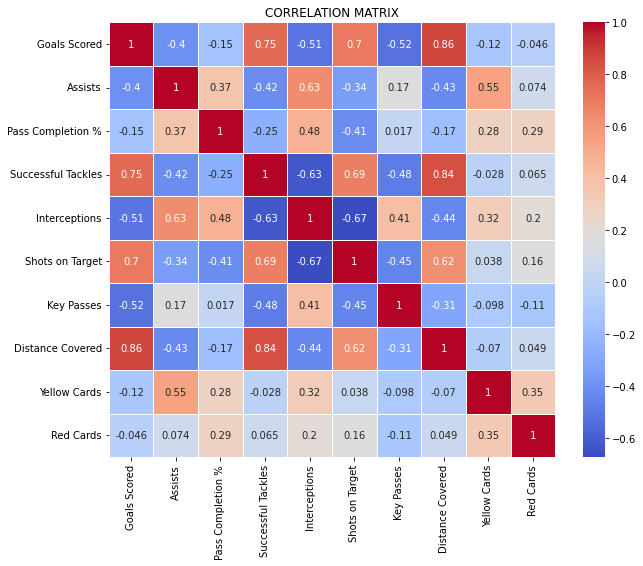

In [13]:

# CORRELATION ANALYSIS

# CREATING THE CORRELATION MATRIX
correlation_matrix = player_performance_data.corr()
print("CORRELATION MATRIX : ")

# VISUALIZING THE CORRELATION MATRIX
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('CORRELATION MATRIX')
plt.show()



PLAYER RANKING FROM HIGH TO LOW : 
   Player Name  Total Score
17    Player 3         9369
13   Player 14         9367
4     Player 5         9366
26   Player 12         9366
19    Player 5         9361
6     Player 7         9360
11   Player 12         9357
25   Player 11         9267
9    Player 10         9257
22    Player 8         9254
0     Player 1         9168
14   Player 15         8669
28   Player 14         8653
2     Player 3         8653
7     Player 8         8651
20    Player 6         8555
16    Player 2         8358
24   Player 10         8356
1     Player 2         8156
27   Player 13         8156
8     Player 9         8052
5     Player 6         7958
21    Player 7         7954
12   Player 13         7954
18    Player 4         7949
29   Player 15         7659
3     Player 4         7659
15    Player 1         7651
23    Player 9         7650
10   Player 11         7645


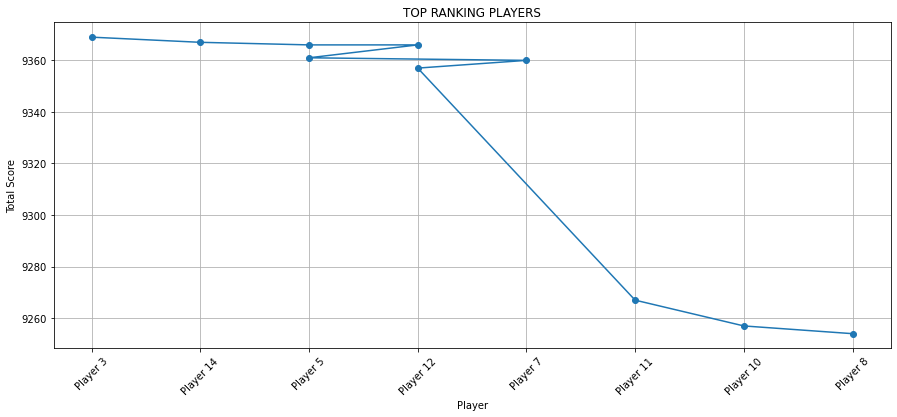

In [14]:
# ANALYSIS BY RANKING THE PLAYERS

# COMPUTING THE TOTAL SCORE BASED ON THE AVAILABLE ATTRIBUTES
player_performance_data['Total Score'] = (
    player_performance_data['Goals Scored'] +
    player_performance_data['Assists'] +
    player_performance_data['Pass Completion %'] +
    player_performance_data['Successful Tackles'] +
    player_performance_data['Interceptions'] +
    player_performance_data['Shots on Target'] +
    player_performance_data['Key Passes'] +
    player_performance_data['Distance Covered'] -
    player_performance_data['Yellow Cards'] -
    player_performance_data['Red Cards']
)

# RANKING THE PLAYERS BASED ON THE TOTAL SCORE FROM HIGHEST TO LOWEST
ranked_players = player_performance_data.sort_values('Total Score', ascending=False)
print("PLAYER RANKING FROM HIGH TO LOW : ")
print(ranked_players[['Player Name', 'Total Score']])

# GETTING THE TOP TEN PLAYERS FOR VISUALIZING
top_ten_players = ranked_players.head(10)

# VISUALIZING IT USING PAIR PLOT
plt.figure(figsize=(15, 6))
plt.plot(top_ten_players['Player Name'], top_ten_players['Total Score'], marker='o')
plt.xlabel('Player')
plt.ylabel('Total Score')
plt.title('TOP RANKING PLAYERS')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


TEAM COMPARISON : 
          TeamName  Total Score
1  Manchester City       129272
0      Inter Milan       127558


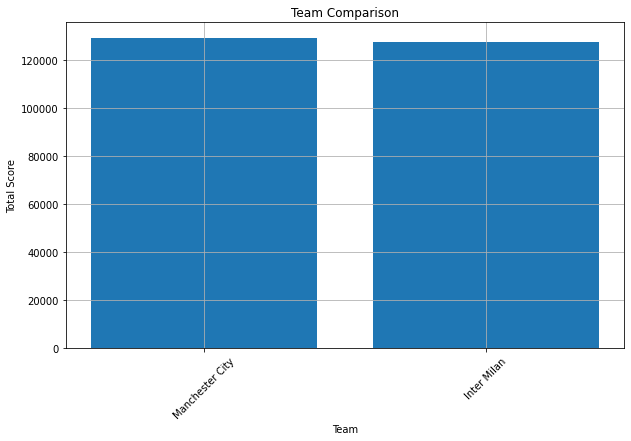

In [15]:
# COMPARITIVE ANALYSIS

# COMPUTING THE TOTAL SCORE FOR BOTH TEAMS
team_performance = player_performance_data.groupby('TeamName')['Total Score'].sum().reset_index()
team_performance = team_performance.sort_values('Total Score', ascending=False)
print("TEAM COMPARISON : ")
print(team_performance)

# VISUALIZING IT USING BAR CHART
plt.figure(figsize=(10, 6))
plt.bar(team_performance['TeamName'], team_performance['Total Score'])
plt.xlabel('Team')
plt.ylabel('Total Score')
plt.title('Team Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()